# EJERCICIOS MINERIA DE DATOS
### ARLETH ALANIS AGUIRRE 1801925
### ARMANDO JAVIER DELGADO CANTU 1887833
### OMAR ALEJANDRO GARZA ESPINOSA 1931548
### SERGIO VELAZQUEZ RIVERA 1805244
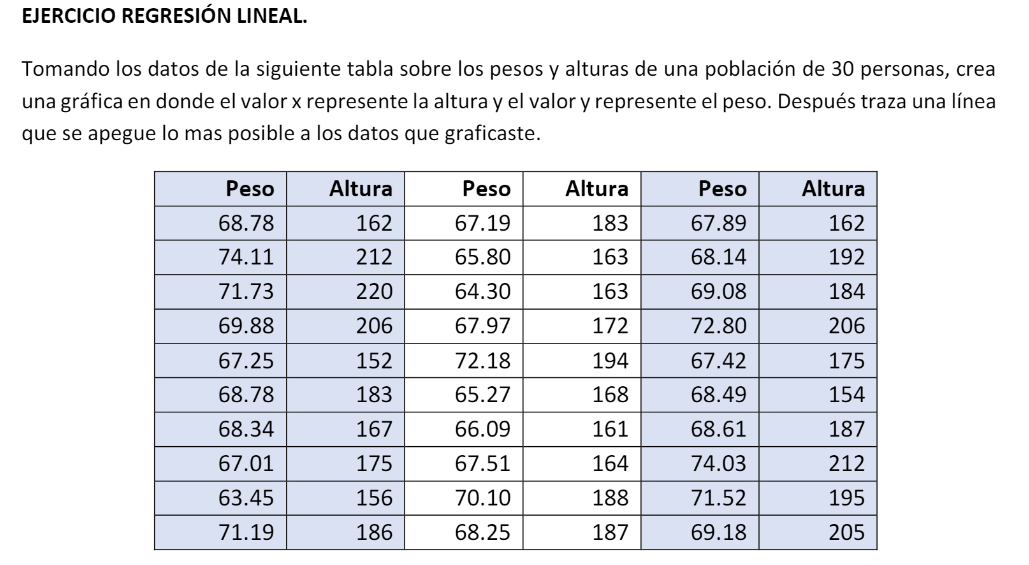

DATOS

x = Altura
y = Peso

In [1]:
x = [162,212,220,206,152,183,167,175,156,186,183,163,163,172,194,168,161,164,188,187,162,192,184,206,175,154,187,212,195,205]
y = [68.78,74.11,71.73,69.88,67.25,68.78,68.34,67.01,63.45,71.19,67.19,65.80,64.30,67.97,72.18,65.27,66.09,67.51,70.10,68.25,67.89,68.14,69.08,72.80,67.42,68.49,68.61,74.03,71.52,69.18]

In [17]:
n = len(y)
n

30

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x = np.array(x)
y = np.array(y)
x

array([162, 212, 220, 206, 152, 183, 167, 175, 156, 186, 183, 163, 163,
       172, 194, 168, 161, 164, 188, 187, 162, 192, 184, 206, 175, 154,
       187, 212, 195, 205])

In [10]:
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x**2)
sumy2 = sum(y**2)
sumxy = sum(x*y)

promx = sumx/n
promy = sumy/n

In [11]:
m = (sumx*sumy - n*sumxy)/(sumx**2 - n*sumx2)
b = promy - m*promx

m, b

(0.10861078195357493, 49.07163369547579)

y = 0.10861078195357493x + 49.07163369547579

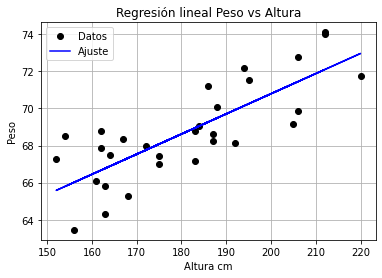

In [24]:
plt.plot(x, y, 'o', label = 'Datos', color = "black")
plt.plot(x, m*x + b, label = 'Ajuste', color = "blue")
plt.xlabel('Altura cm')
plt.ylabel('Peso')
plt.title('Regresión lineal Peso vs Altura')
plt.grid()
plt.legend()
plt.show()

--

**EJERCICIO REGLAS DE ASOCIACIÓN**

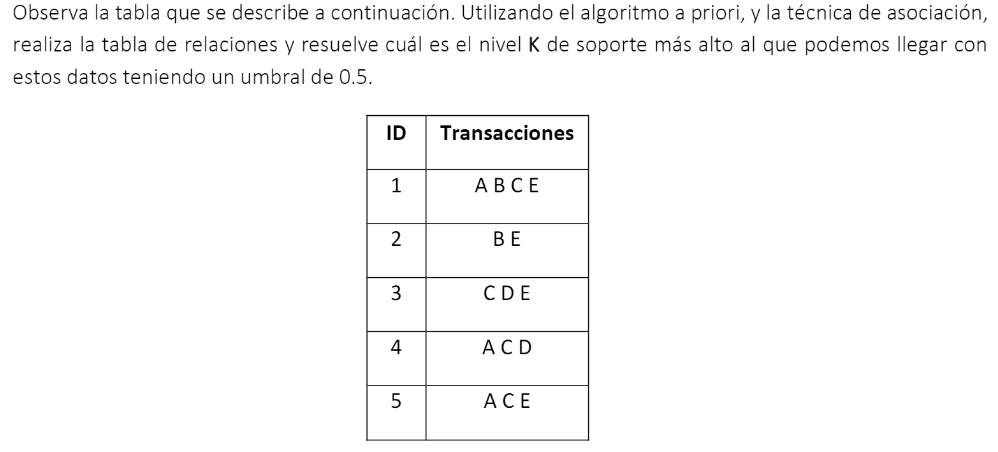

In [3]:
def Load_data():
    
    transacciones = (["A", "B", "C", "E"],["B", "E"],["C", "D", "E"],["A", "C", "D"],["A", "C", "E"],)

    return transacciones

In [4]:
def Conjunto1 (data):
    C1 = []
    for transaction in data:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    
    return [ set (x) for x in C1]

In [5]:
def ConjuntoK(Lk, k):
    list_cand = []
    len_Lk = len(Lk)
    
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                list_cand.append(Lk[i] | Lk[j])
    return list_cand

In [26]:
def scanD(Data, Ck, min_support):

    count = {}
    for transaction in data:
        tr=set(transaction)
        for candidate in Ck:
            if candidate.issubset(tr):
                can=frozenset(candidate)
                if can not in count:
                    count[can]=1
                else:
                    count[can]+=1
                    num_items= float(len(D))
                        
    list_cand=[]
    support_data={}
    
    
    for key in count:
        support=count[key]/num_items
        
        if support>=min_support:
            list_cand.insert(0,key)
        support_data[key]=support
            
    return list_cand, support_data
    
    

In [28]:
min_support= 0.5

In [29]:
data= Load_data()
data

(['A', 'B', 'C', 'E'],
 ['B', 'E'],
 ['C', 'D', 'E'],
 ['A', 'C', 'D'],
 ['A', 'C', 'E'])

TENEMOS k=1 entonces Ck=C1

In [30]:
C1 = Conjunto1(data)
C1

[{'A'}, {'B'}, {'C'}, {'D'}, {'E'}]

In [31]:
D=list(map(set,data))
D

[{'A', 'B', 'C', 'E'},
 {'B', 'E'},
 {'C', 'D', 'E'},
 {'A', 'C', 'D'},
 {'A', 'C', 'E'}]

In [32]:
L1, support_data1 = scanD(D, C1, min_support)
L1

[frozenset({'E'}), frozenset({'C'}), frozenset({'A'})]

In [33]:
support_data1

{frozenset({'A'}): 0.6,
 frozenset({'B'}): 0.4,
 frozenset({'C'}): 0.8,
 frozenset({'E'}): 0.8,
 frozenset({'D'}): 0.4}

 AHORA TENEMOS k=2 , POR LO QUE Ck=C2

In [34]:
C2= ConjuntoK(L1, k=2)
C2

[frozenset({'C', 'E'}), frozenset({'A', 'E'}), frozenset({'A', 'C'})]

In [35]:
L2, support_data2 = scanD(D, C2, min_support)
L2

[frozenset({'A', 'C'}), frozenset({'C', 'E'})]

In [36]:
support_data2

{frozenset({'C', 'E'}): 0.6,
 frozenset({'A', 'E'}): 0.4,
 frozenset({'A', 'C'}): 0.6}

FINALMENTE k=3 ...


In [37]:
C3= ConjuntoK(L2, k=3)
C3


[frozenset({'A', 'C', 'E'})]

In [43]:
L3, support_data3 = scanD(D, C3, min_support)
L3

[]

In [44]:
support_data3

{frozenset({'A', 'C', 'E'}): 0.4}

POR LO TANTO, LOS CONJUNTOS SON LOS SIGUIENTES :

Cuando k=1

In [45]:
support_data1

{frozenset({'A'}): 0.6,
 frozenset({'B'}): 0.4,
 frozenset({'C'}): 0.8,
 frozenset({'E'}): 0.8,
 frozenset({'D'}): 0.4}

Cuando k=2

In [46]:
support_data2

{frozenset({'C', 'E'}): 0.6,
 frozenset({'A', 'E'}): 0.4,
 frozenset({'A', 'C'}): 0.6}

Cuando k=3

In [47]:
support_data3

{frozenset({'A', 'C', 'E'}): 0.4}

### Conclusion 

Los niveles de k mas altos y que cumplen con el umbral de  0.5 son los siguientes:

        * En k=1 
               "A" = 0.6
               "C" = 0.8
               "E" = 0.8
               
        * En k=2
               "C,E"= 0.6
               "A,C"= 0.6 
              

